In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_multitrain_20000 - Copy.csv to merged_multitrain_20000 - Copy.csv


In [ ]:
df = pd.read_csv('merged_multitrain_20000 - Copy.csv' )             
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,tachometer,ub_axial,ub_radial,ub_tang,oh_axial,oh_radial,oh_tang,micro,fault
count,40006.00000,40006.00000,40006.00000,40006.00000,40006.00000,40006.00000,40006.00000,40006.00000,40006.00000
mean,-0.00320,-0.00257,0.00175,0.00199,0.21737,-0.09248,0.11503,0.01429,0.50005
std,1.62118,1.67405,0.51380,0.50318,0.96991,0.63418,0.74439,0.12512,0.50001
min,-1.07110,-17.75200,-5.14500,-7.87250,-3.71980,-6.43680,-3.13590,-0.28125,0.00000
25%,-0.62495,-0.88682,-0.28309,-0.05023,-0.34057,-0.03122,-0.16049,-0.09071,0.00000
50%,-0.57258,0.18617,0.02320,0.00168,0.13037,-0.00084,0.10710,-0.00224,1.00000
75%,-0.49969,1.10275,0.30775,0.05012,0.79835,0.02920,0.37793,0.10266,1.00000
max,5.03680,5.67320,5.10710,6.90160,4.70420,3.39590,4.00010,0.63305,1.00000


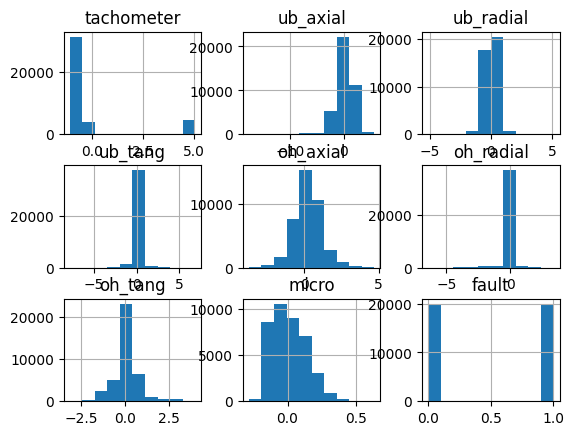

In [ ]:
df.hist()
plt.show()

In [ ]:
conserve=['ub_axial','ub_radial','ub_tang','oh_axial','oh_radial','oh_tang','micro','fault']
df = df[conserve]
df.shape

(40006, 8)

In [ ]:
print(df.dtypes)

ub_axial     float64
ub_radial    float64
ub_tang      float64
oh_axial     float64
oh_radial    float64
oh_tang      float64
micro        float64
fault          int64
dtype: object


In [ ]:
# input missing valuesv execpt categorical
from sklearn.impute import SimpleImputer
imp_numeric = SimpleImputer(missing_values=np.nan, strategy='median')
num_cols = df.select_dtypes(exclude=['object']).columns 


for col in num_cols:
  if df[col].isnull().sum().any() > 0:
    df[col] = imp_numeric.fit_transform(df[[col]])
  else:
    pass

In [ ]:
df.isna().sum()

ub_axial     0
ub_radial    0
ub_tang      0
oh_axial     0
oh_radial    0
oh_tang      0
micro        0
fault        0
dtype: int64

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')
x = df.drop('fault', axis=1)
#x = df.drop('tachometer', axis=1)
y = df['fault']

# oversample = BorderlineSMOTE()   
# x, y = oversample.fit_resample(x, y)

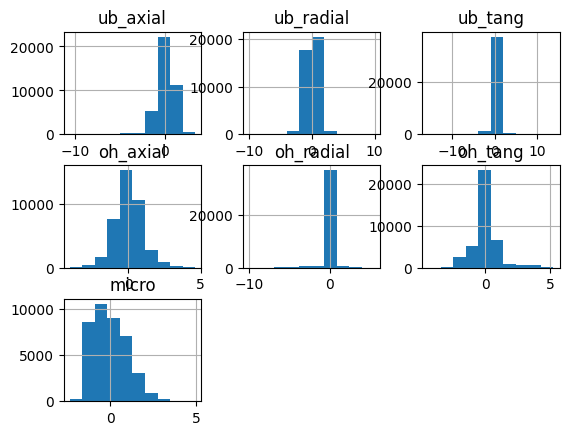

In [ ]:
SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns)
df_scaled.hist()
plt.show()

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.2, random_state = None)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score


X_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.2, random_state = None)
param_grid = {'C': [1,10,100,1000], 
              'gamma': [0.001,0.01,0.1,1],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.645 total time=  41.8s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.641 total time=  39.7s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.646 total time=  39.9s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.644 total time=  40.8s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.636 total time=  40.5s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.769 total time=  28.5s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.775 total time=  28.6s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.774 total time=  28.5s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.782 total time=  28.6s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.769 total time=  27.8s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.847 total time=  19.6s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
for i in range(10):
  X_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.2, random_state = None)
  grid = SVC(C= 100,gamma= 1,kernel = 'rbf')
  grid.fit(X_train, y_train)
  print("Train iteration",i)

Train iteration 0
Train iteration 1
Train iteration 2
Train iteration 3
Train iteration 4
Train iteration 5
Train iteration 6
Train iteration 7
Train iteration 8
Train iteration 9


In [ ]:

grid_predictions = grid.predict(x_test)
  
# print classification report
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))


[[3825  197]
 [ 392 3588]]
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      4022
         1.0       0.95      0.90      0.92      3980

    accuracy                           0.93      8002
   macro avg       0.93      0.93      0.93      8002
weighted avg       0.93      0.93      0.93      8002



In [ ]:

grid_predictions1 = grid.predict(X_train)
  
# print classification report
print("Train accuracy:",accuracy_score(y_train,grid_predictions1))
print("Train confusion matrix",confusion_matrix(y_train,grid_predictions1))

Train accuracy: 0.9406949131358581
Train confusion matrix [[15402   577]
 [ 1321 14704]]


**RandomForest**

In [ ]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

rfclassifier = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
rfclassifier.fit(X_train, y_train)# fit function is where it trains
rfclassifier.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
for i in range(10):
  X_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.2, random_state = None)
  grid1 = RandomForestClassifier(bootstrap=True,max_depth = 80, max_features = 3,min_samples_leaf= 3,min_samples_split= 8,n_estimators= 200)
  grid1.fit(X_train, y_train)
  print("Train iteration",i+1)

Train iteration 1
Train iteration 2
Train iteration 3
Train iteration 4
Train iteration 6
Train iteration 7
Train iteration 8
Train iteration 9
Train iteration 10


In [ ]:
grid_predictions2 = grid1.predict(x_test)
  
# print classification report
print(confusion_matrix(y_test, grid_predictions2))
print(classification_report(y_test, grid_predictions2))


[[3794  214]
 [ 303 3691]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      4008
         1.0       0.95      0.92      0.93      3994

    accuracy                           0.94      8002
   macro avg       0.94      0.94      0.94      8002
weighted avg       0.94      0.94      0.94      8002



In [ ]:
grid_predictions3 = grid1.predict(X_train)
print("Train accuracy:",accuracy_score(y_train,grid_predictions3))
print("Train confusion matrix",confusion_matrix(y_train,grid_predictions3))

Train accuracy: 0.9909073865766779
Train confusion matrix [[15907    86]
 [  205 15806]]


**KNN classifier**

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute')

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid search model
knnClassifier = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

knnClassifier.fit(X_train, y_train)
knnClassifier.best_params_

Fitting 10 folds for each of 99 candidates, totalling 990 fits


{'n_neighbors': 3}

In [ ]:
k_NN = knnClassifier.predict(x_test)
  
# print classification report
print(confusion_matrix(y_test, k_NN))
print(classification_report(y_test, k_NN))

[[3704  304]
 [ 516 3478]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      4008
         1.0       0.92      0.87      0.89      3994

    accuracy                           0.90      8002
   macro avg       0.90      0.90      0.90      8002
weighted avg       0.90      0.90      0.90      8002



In [ ]:
k_NN1 = knnClassifier.predict(X_train)
print("Train accuracy:",accuracy_score(y_train,k_NN1))
print("Train confusion matrix",confusion_matrix(y_train,k_NN1))

Train accuracy: 0.9478502687164104
Train confusion matrix [[15377   616]
 [ 1053 14958]]


**Decision tree**

In [ ]:
#Decision Tree
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30],
    'min_samples_split' : range(10,500,20),
    'splitter' : ['best', 'random'],
    'min_samples_leaf': [5,8,11],
    'max_features': ['log2', 'sqrt','auto']
}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
dtClassifier = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

dtClassifier.fit(X_train, y_train)
dtClassifier.best_params_

In [ ]:
for i in range(10):
  X_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.2, random_state = None)
  grid2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 30, max_features = 'log2',min_samples_leaf=8,min_samples_split=50,splitter = 'best')
  grid2.fit(X_train, y_train)
  print("Train iteration",i+1)

Train iteration 1
Train iteration 2
Train iteration 3
Train iteration 4
Train iteration 5
Train iteration 6
Train iteration 7
Train iteration 8
Train iteration 9
Train iteration 10


In [ ]:
grid_predictions4 = grid2.predict(x_test)
  
# print classification report
print(confusion_matrix(y_test, grid_predictions4))
print(classification_report(y_test, grid_predictions4))


[[3655  334]
 [ 451 3562]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      3989
         1.0       0.91      0.89      0.90      4013

    accuracy                           0.90      8002
   macro avg       0.90      0.90      0.90      8002
weighted avg       0.90      0.90      0.90      8002



In [ ]:
grid_predictions5 = grid2.predict(X_train)
print("Train accuracy:",accuracy_score(y_train,grid_predictions5))
print("Train confusion matrix",confusion_matrix(y_train,grid_predictions5))

Train accuracy: 0.9257280339957505
Train confusion matrix [[15078   934]
 [ 1443 14549]]


**MODEL SAVING PART**

---



---



In [ ]:
import pickle
with open('svm_model_pickle_20000_binary','wb') as f:
  pickle.dump(grid,f)

In [ ]:
import pickle
with open('svm_model_pickle_20000_binary','rb') as f:
  mod = pickle.load(f)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_20000_test_binary.csv to merged_20000_test_binary.csv


In [ ]:
test_data = pd.read_csv('merged_20000_test_binary.csv' )  

In [ ]:
test_data.fault.value_counts()

1    255
0     51
Name: fault, dtype: int64

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

In [ ]:
x = test_data.drop('fault', axis=1)
x = x.drop('tachometer', axis = 1)
y = test_data['fault']

In [ ]:
SS = StandardScaler()
test_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns)

In [ ]:
test_pred=grid.predict(x)

In [ ]:
print(confusion_matrix(y, test_pred))
print(classification_report(y, test_pred))

[[ 51   0]
 [ 25 230]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        51
           1       1.00      0.90      0.95       255

    accuracy                           0.92       306
   macro avg       0.84      0.95      0.88       306
weighted avg       0.95      0.92      0.92       306

